# Análisis Exploratorio de Datos (EDA): Titanic

## Introducción
El Titanic es un caso clásico para analizar porque combina una historia real con datos variados como variables numéricas (edad, tarifa) y categóricas (clase, sexo), además de valores faltantes. Por lo que esto lo hace interesante para poder practicar EDA, ya que no se trata solo de graficar, sino de hacer preguntas y buscar patrones que expliquen lo que pudo haber pasado.

En este notebook voy a explorar cómo se distribuyen algunas variables importantes, cómo se relacionan entre sí y qué pasa con los valores faltantes. Mi objetivo no es “adivinar” la historia exacta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Parte 1: Variación (¿Cómo varían mis datos?)

### Variable 1: Age

Pregunta: ¿Cómo se distribuye la edad de los pasajeros?  
¿Existen grupos etarios claramente definidos?


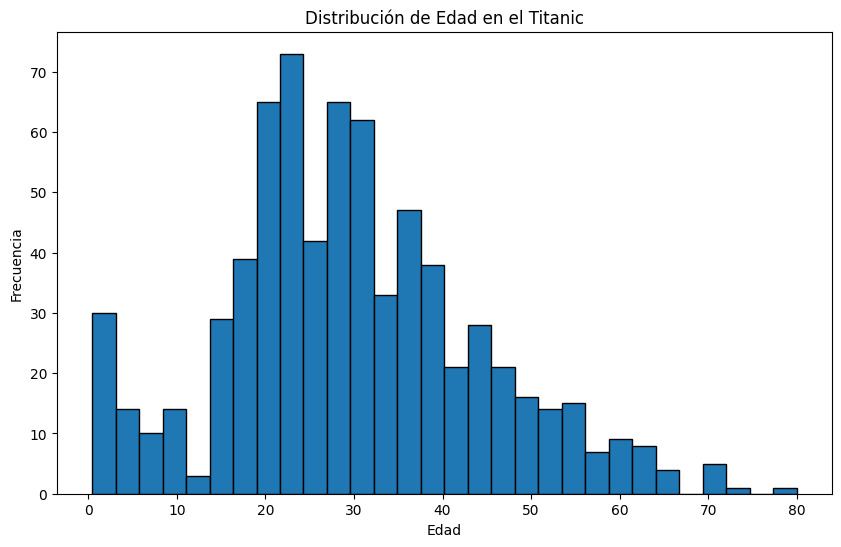

In [2]:
plt.figure(figsize=(10,6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en el Titanic')
plt.show()

**Observaciones:**
La distribución de edad muestra que la mayoría de los pasajeros se concentra entre los 20 y 40 años. Hay pocos niños pequeños y también menos pasajeros de edad avanzada.

No se observan grupos etarios completamente separados, pero sí una concentración en adultos jóvenes.

**Hipótesis:**
Es probable que la mayoría de los pasajeros fueran adultos jóvenes porque era una edad común para migrar o viajar por trabajo. También podría reflejar la composición demográfica típica de la época.


### Variable 2: Survived

Pregunta: ¿Qué proporción de pasajeros sobrevivió?


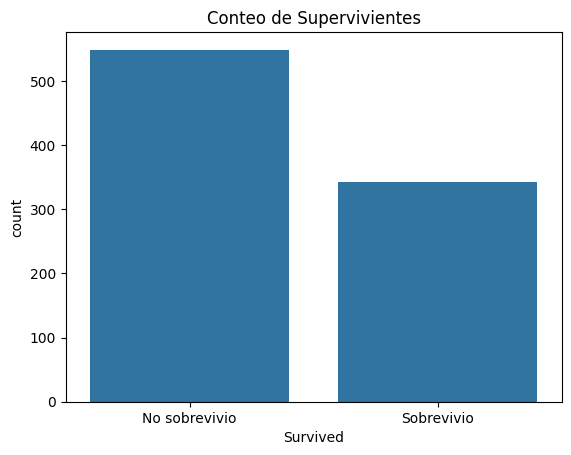

In [3]:
titanic['Survived'].value_counts(normalize=True)
sns.countplot(data=titanic, x='Survived')
plt.title('Conteo de Supervivientes')
plt.xticks([0,1], ['No sobrevivio', 'Sobrevivio'])
plt.show()


**Observaciones:**
La mayoría de los pasajeros no sobrevivió. Aproximadamente más de la mitad falleció, lo cual coincide con el contexto histórico del Titanic.

**Hipótesis:**
El alto número de fallecidos puede explicarse por la falta de suficientes botes salvavidas y por decisiones de evacuación que priorizaron ciertos grupos como niños y mujeres.


## Parte 2: Covariación (¿Cómo se relacionan las variables?)

### Relación 1: ¿La tasa de supervivencia fue diferente entre clases sociales?
Pregunta: ¿Los pasajeros de primera clase tuvieron mayor probabilidad de sobrevivir que los de tercera clase?



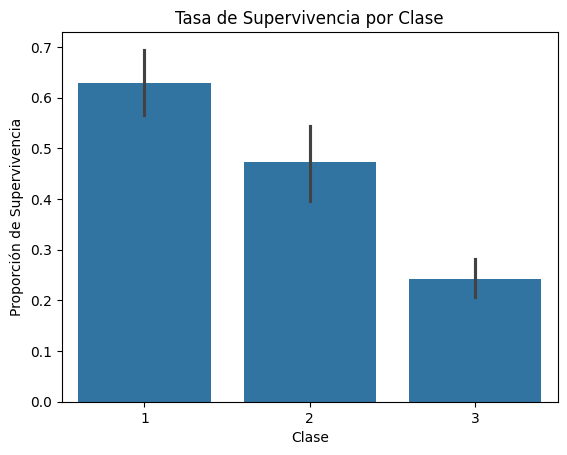

In [7]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Tasa de Supervivencia por Clase')
plt.ylabel('Proporción de Supervivencia')
plt.xlabel('Clase')
plt.show()

**Interpretación:**

La gráfica muestra que los pasajeros de primera clase tuvieron una tasa de supervivencia considerablemente mayor en comparación con segunda clase y tercera clase. 

Este patrón hace creer que la supervivencia no fue aleatoria, sino que estuvo relacionada con la posición socioeconómica. Aunque históricamente se habla de la política de "mujeres y niños primero", los datos indican que la clase social también pudo haber influido en las oportunidades de evacuación.

Una posible explicación es que los pasajeros de primera clase tenían acceso más cercano a los botes salvavidas, mejor información y mayor prioridad durante la evacuación. Además, la ubicación física dentro del barco pudo haber facilitado su salida más rápida en comparación con los pasajeros de tercera clase, quienes estaban en niveles inferiores.
Esto sugiere que las desigualdades sociales de la época pudieron haberse reflejado incluso en una situación de emergencia.


### Relación 2: ¿Hubo diferencias de supervivencia por género?

Pregunta: ¿Las mujeres tuvieron mayor probabilidad de sobrevivir que los hombres?


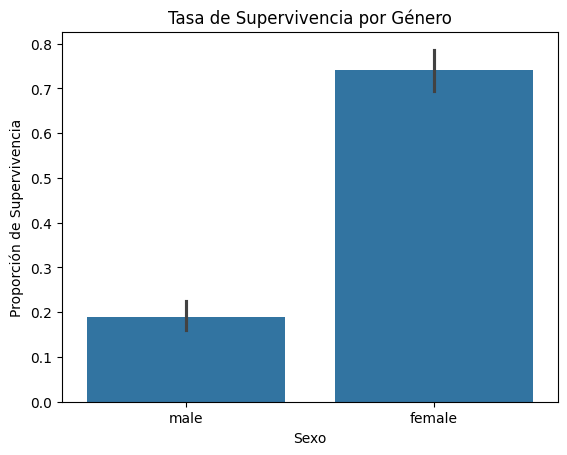

In [9]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Proporción de Supervivencia')
plt.xlabel('Sexo')
plt.show()


**Interpretación**

Vemos una diferencia muy marcada en la tasa de superviviencia por género. Mientras que aproximadamente el 70% de las mujeres sobrevivió, solo al rededor del 20% de los hombres sovevivieron. La diferencia si es considerable y sigiere que el género si fue uno de los factores más importantes y determinantes en la supervivencia.

Este patrón es consistente con el principio de "mujeres y niños primero", que parece haberse aplicado de manera significativa durante la evacuación. Pero más alla que una norma social, también puede interpretarse como una manifestación de las expectativas culturales de la época, donde se esperaba que los hombres asumieran el rol protector llegando al punto de sacrificarse.

Este gran contraste que vemos sugiere que el género tuvo un peso incluso mayor que otras variables como la edad.

### Relación 3: ¿El efecto del género cambia según la clase social?

Pregunta: ¿Las mujeres tuvieron mayor probabilidad de sobrevivir en todas las clases sociales o la clase influyó en esa ventaja?

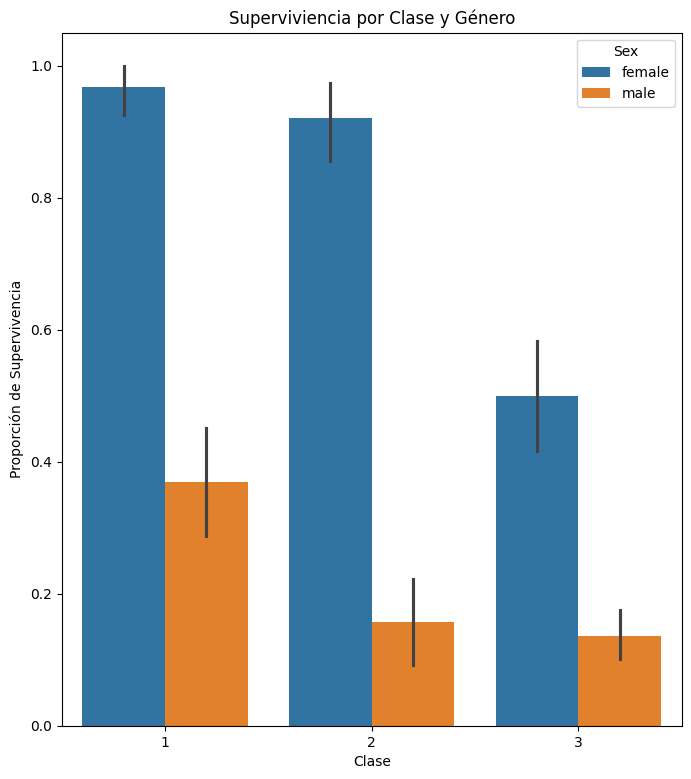

In [10]:
plt.figure(figsize=(8,9))
sns.barplot(data=titanic, x="Pclass", y='Survived', hue='Sex')
plt.title('Superviviencia por Clase y Género')
plt.xlabel('Clase')
plt.ylabel('Proporción de Supervivencia')
plt.show()


**Interpretación**

Podemos observar que, aunque las muejres de todas las clases tuvieron mayor tasa de supervivencia que los hombres, sí existe una diferencia según la clase social.

Las mujeres de primera y segunda clase presentan tasas de supervivencia muy altas y muy similares entre sí, mientras que en tecera clase se observa como si hubo una disminución considerable. Sugiriendo que, aunque el género fue un factor determinante, la clase social también influyo significativamente.

En el caso de los hombres, la diferencia entre clases es aún más marcada. Los hombres de primera clase sobrevivieron en una proporción más grande que los de seguna y tercera clase.

Por lo tanto, podemos inferir que tanto el género como la clase social fueron influyentes en las probabilidades de supervivencia.

## Parte 3: Valores Faltantes

In [12]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

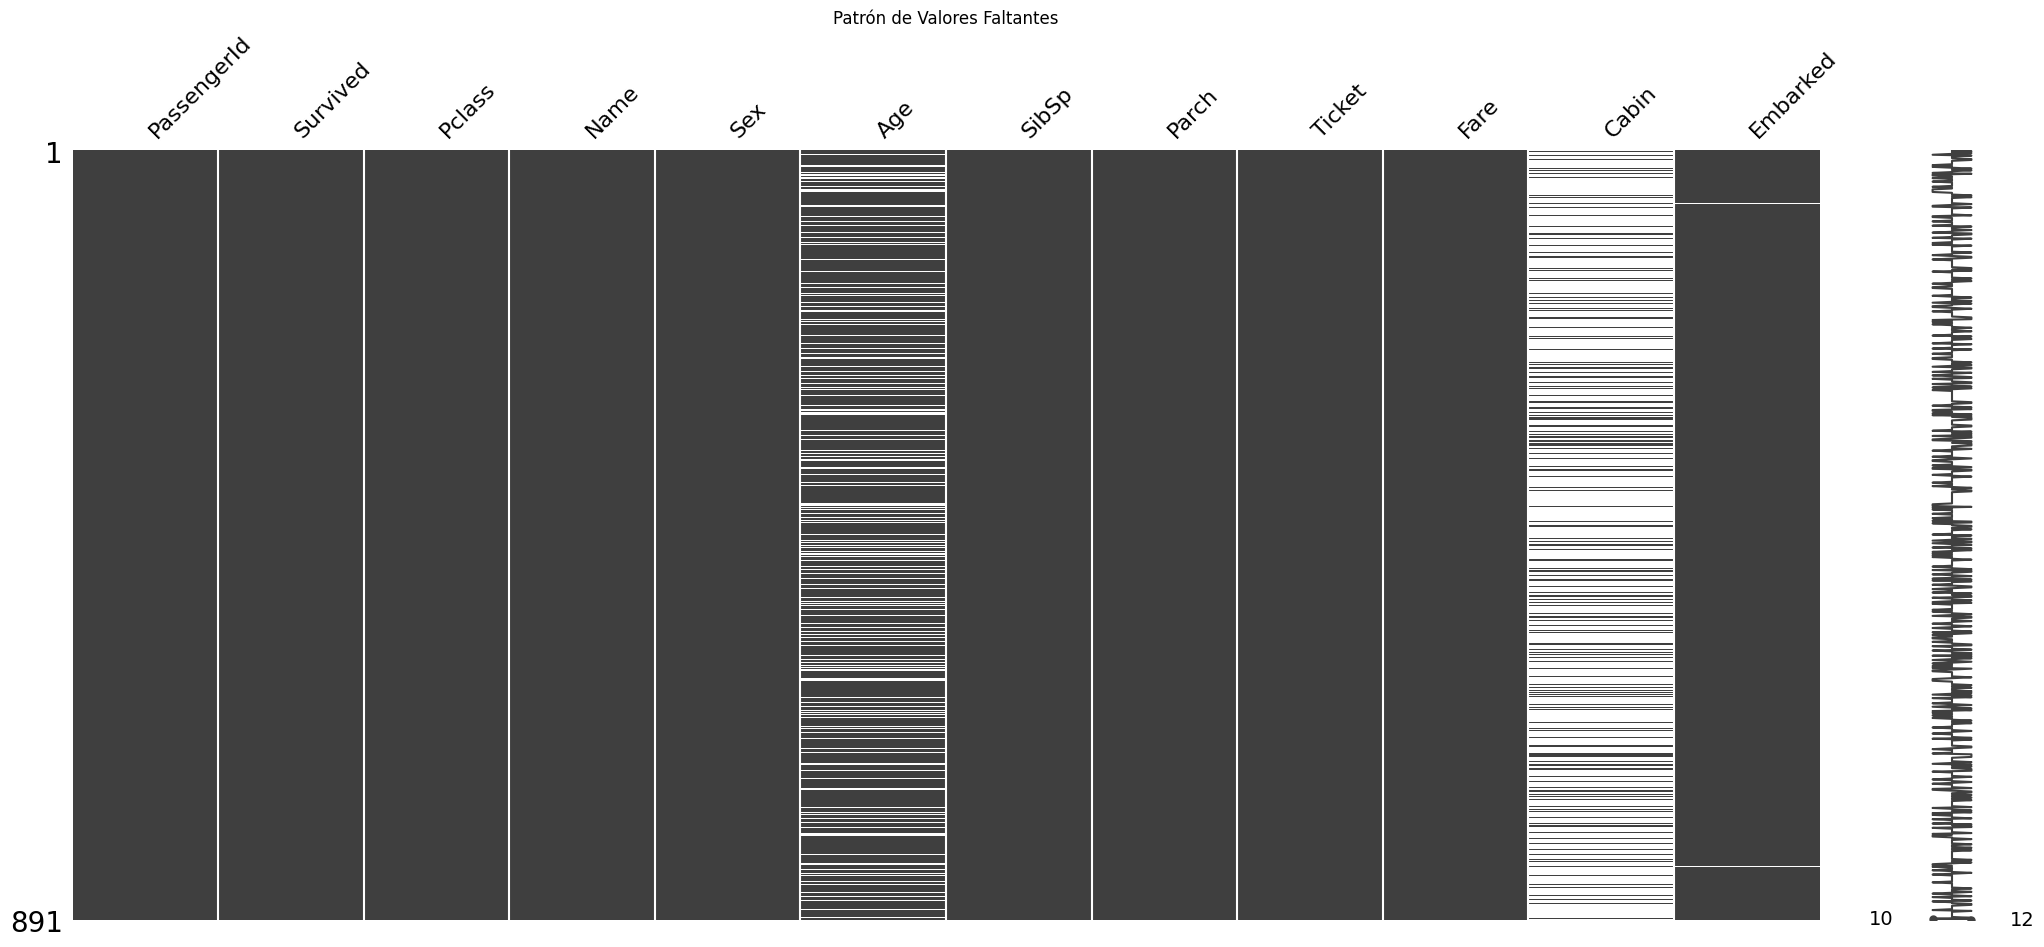

In [18]:
# Visualizar patrón de valores faltantes
import missingno as msno
msno.matrix(titanic)
plt.title("Patrón de Valores Faltantes")
plt.show()


**¿Qué variables tienen valores faltantes?**

Al analizar los valores faltantes podemos observar que *age* tiene 177 valores faltantes, *cabin* tiene 687 y *embarked* tiene solo 2, el resto de las variables no presentan valores faltantes. 

Visualmente en la matriz, podemos ver claramente que *Cabin* es la variable con mayor cantidad de datos perdidos, seguida de *Age* mientras *Embarked* solo muestra una línea.

**¿Los valores faltantes son aleatorios o siguen un patrón?**

En *cabin*, la mayoría de los registros están vacíos. Sugiriendo que no es un valor completamente aleatorio, por lo que probablemente muchos pasajeros no tenían una cabina registrada o era un dato que no se documentó del todo.
En *age* los valores faltantes parecen estar distribuidos de manera más dispersa. Sin embargo, sería interesante explorar si estos faltantes están relacionados con clase o género.
En *embarked* los valores son mínimos y no parecen tener un patrón relevante.

Por lo tanto, no todos los valores parecen ser completamente aleatorios

**¿Cómo manejaría estos valores faltantes?**

En *cabin*, dado que tiene demasiados valores faltantes, problamente eliminaría esta variable del análisis general, ya que considerarla prodría ser un sesgo o datos erroneos.
En el caso de *age*, no lo eliminaría la variable porque es importante para el análisis. Por lo que algunas posibles soluciones seria ejecutarlo con la mediana o por grupos, para que sea más razonable.
Y como *embarked* solo tiene 2 valores faltantes, podría eliminrlos o rellenarlos con la moda.

## Parte 4: Una Pregunta Propia

**Pregunta: ¿Los pasajeros que pagaron una tarifa más alta dentro de la misma clase social tuvieron mayor probabilidad de sobrevivir?**

### Análisis

Para responder esta pregunta, primero necesitaba encontrar una forma justa de comparar las tarifas. No podía simplemente decir que quien pagó más sobrevivió más, porque las tarifas cambian muchísimo entre clases. Es obvio que la primera clase pagó mucho más que la tercera.

Por eso decidí comparar las tarifas dentro de cada clase social. Es decir, en lugar de comparar a toda la gente del barco, comparé pasajeros de la misma clase entre sí. 

Para hacerlo más claro, dividiré a los pasajeros de cada clase en dos grupos, los que pagaron una tarifa más alta que la mediana de su clase y los que pagaron una tarifa más baja o igual a la mediana.

De esta manera puedo analizar si, incluso dentro de la misma clase social, pagar más dinero representaba alguna ventaja en términos de supervivencia.


In [19]:
mediana_fare=titanic.groupby('Pclass')['Fare'].transform('median')

# Nueva variable
titanic['FareLevel']=np.where(titanic['Fare']>mediana_fare,'Alta', 'Baja')
titanic[['Pclass', 'Fare', 'FareLevel']].head()

,Pclass,Fare,FareLevel
0,3,7.2500,Baja
1,1,71.2833,Alta
2,3,7.9250,Baja
3,1,53.1000,Baja
4,3,8.0500,Baja


Ahora si analizamos supervivencia por clase y fare

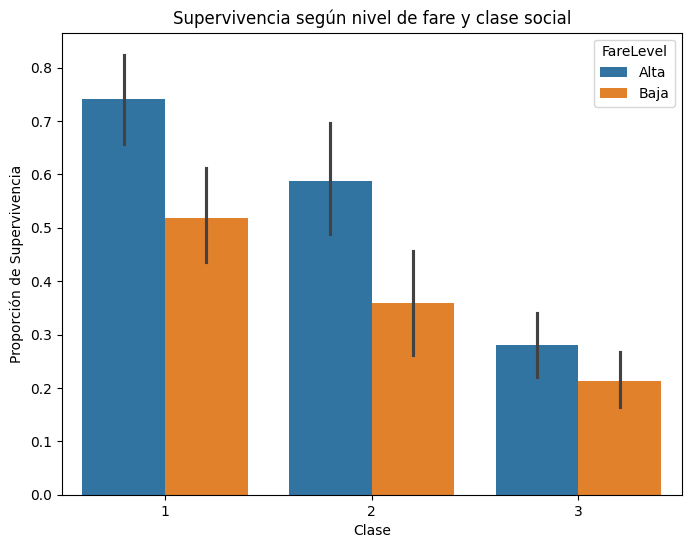

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='FareLevel')
plt.title('Supervivencia según nivel de fare y clase social')
plt.xlabel('Clase')
plt.ylabel('Proporción de Supervivencia')
plt.show()

**Interpretación**

Al comparar pasajeros dentro de la misma clase social, observamos que aquellos que pagaron una mayor tarifa tienden a presentar mejor tasa de supervivencia en comparación con los que pagaron menos dentro de su misma clase.

Esto sugiere que no solo la clase social influyó, sino que también las diferencias económicas internas dentro de cada grupo. Es posible que quienes pagaron más tuvieran mejores ubicaciones en el barco, es decir, camarotes más cercanos a la cubierta o con más facilidad en caso de evacuación.


**Conclusión**

La clase social fue un factor importante, pero este análisis sugiere que el nivel económico relativo también pudo haber influido en la supervivencia. Esto refuerza la idea de que las desigualdades estructurales del barco no solo eran entre clases, sino también internas.

## Reflexión Final

Lo más difícil del análisis no fue hacer las gráficas, sino formular las preguntas. Es fácil visualizar variables como edad o clase social, pero el verdadero reto está en preguntarse qué historia puede estar detrás de estos datos y cómo relacionarlos en distintas variables para descubrir patrones no tan evidentes.

También aprendí que el EDA es un proceso iterativo. Muchas veces una gráfica lleva a nuevas preguntas y obliga a reconsiderar interpretaciones iniciales. Por ejemplo, al observar la diferencia de género parecía que la regla de "mujeres y niños primero" explicaba todo, pero al analizar clase y tarifa, se vuelve evidente la desigualdad económica también tuvo un papel importante.

Además, trabajar con valores faltantes hizo que me hizo entender que los datos nunca son perfectos. No basta con ignorarlos, hay que pensar si son aleatorios o nos pueden afectar las conclusiones.
